In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

f:\Gen AI Repos\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

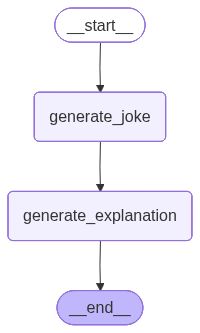

In [7]:
workflow

In [8]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!',
 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" can refer to the flavor of cheese on a pizza. In another sense, "cheesy" can mean something that is corny or unoriginal, as in a joke or a pick-up line. So, in this joke, the pizza goes to the doctor because it is feeling "cheesy" in the sense of being overly corny or unoriginal, rather than in the sense of having too much cheese on it.'}

In [9]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!', 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" can refer to the flavor of cheese on a pizza. In another sense, "cheesy" can mean something that is corny or unoriginal, as in a joke or a pick-up line. So, in this joke, the pizza goes to the doctor because it is feeling "cheesy" in the sense of being overly corny or unoriginal, rather than in the sense of having too much cheese on it.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb4d-2336-61f0-8002-7a5b12b0ceb6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T17:09:41.333632+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb4d-16e4-6c3b-8001-bab9151c66a9'}}, tasks=(), interrupts=())

In [11]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!', 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" can refer to the flavor of cheese on a pizza. In another sense, "cheesy" can mean something that is corny or unoriginal, as in a joke or a pick-up line. So, in this joke, the pizza goes to the doctor because it is feeling "cheesy" in the sense of being overly corny or unoriginal, rather than in the sense of having too much cheese on it.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb4d-2336-61f0-8002-7a5b12b0ceb6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T17:09:41.333632+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb4d-16e4-6c3b-8001-bab9151c66a9'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 

In [12]:
workflow.get_state(config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0ecb4d-0267-61af-bfff-aa0b75012799"}})

StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ecb4d-0267-61af-bfff-aa0b75012799'}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, created_at='2026-01-08T17:09:37.893371+00:00', parent_config=None, tasks=(PregelTask(id='92bd80b4-870c-5e79-cc37-53a5be83d885', name='__start__', path=('__pregel_pull', '__start__'), error=None, interrupts=(), state=None, result={'topic': 'pizza'}),), interrupts=())

In [16]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0ecb4d-0267-61af-bfff-aa0b75012799"}})

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the party? Because it knew it would be a "slice" of a good time!',
 'explanation': 'This joke plays on the double meaning of the word "slice." In this context, "slice" is used to refer to a piece of pizza, but it can also be used colloquially to mean a fun or enjoyable time. Therefore, the pizza went to the party because it knew it would have a great time, or a "slice" of a good time. The joke is a playful and punny way to personify the pizza and add humor to the idea of a food item attending a social event.'}

In [17]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it knew it would be a "slice" of a good time!', 'explanation': 'This joke plays on the double meaning of the word "slice." In this context, "slice" is used to refer to a piece of pizza, but it can also be used colloquially to mean a fun or enjoyable time. Therefore, the pizza went to the party because it knew it would have a great time, or a "slice" of a good time. The joke is a playful and punny way to personify the pizza and add humor to the idea of a food item attending a social event.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb59-5349-6df8-8002-1e3aec26e309'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T17:15:08.497425+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb59-3531-644d-8001-34d19b394c58'}}, tasks=(), interrupts=()),
 StateSnapshot(value

## Update State

In [20]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0ecb4d-0267-61af-bfff-aa0b75012799", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ecb63-4a25-6a32-8000-96f029fbcfc8'}}

In [22]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb63-4a25-6a32-8000-96f029fbcfc8'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2026-01-08T17:19:35.974318+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb4d-0267-61af-bfff-aa0b75012799'}}, tasks=(PregelTask(id='c99965a7-4e6f-ec82-e082-f4479fbd8c5c', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it knew it would be a "slice" of a good time!', 'explanation': 'This joke plays on the double meaning of the word "slice." In this context, "slice" is used to refer to a piece of pizza, but it can also be used colloquially to mean a fun or enjoyable time. Therefore, the pizza went to th

In [26]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0ecb63-4a25-6a32-8000-96f029fbcfc8"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to the doctor?\nBecause it was feeling a little pastry-cally ill!',
 'explanation': 'This joke is a play on words between "pastry" and "pastorally." The humor comes from the pun on the word "pastry-cally" sounding like "pastorally," making it seem like the samosa went to the doctor because it was feeling a little ill in a pastoral or rural setting. The joke is meant to be light-hearted and silly, playing on the idea of a food item like a samosa needing to see a doctor for feeling unwell.'}

In [27]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to the doctor?\nBecause it was feeling a little pastry-cally ill!', 'explanation': 'This joke is a play on words between "pastry" and "pastorally." The humor comes from the pun on the word "pastry-cally" sounding like "pastorally," making it seem like the samosa went to the doctor because it was feeling a little ill in a pastoral or rural setting. The joke is meant to be light-hearted and silly, playing on the idea of a food item like a samosa needing to see a doctor for feeling unwell.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb69-5fe5-6877-8002-6005c38d31d5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T17:22:19.316209+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ecb69-4bf3-66e2-8001-93022c2958c4'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'samosa', 